# This is the notebook for my Coursera IBM Datascience Capstone project

In [1]:
import pandas as pd
import numpy as np
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


# Introduction/Business Problem

I am looking to determine the probability of a car accident occuring as well as the severity of the accident. I will be utilizing weather, traffic, and road contidion data in order to determine these two factors. My target audience will be car drivers who would like to know this information in order to be safer on the road.

# Data

I will be using data from https://data-seattlecitygis.opendata.arcgis.com (full link: https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0?geometry=-123.524%2C47.291%2C-119.351%2C47.939) for my predictions. I will be utilizing the road contidtions, weather, and severity, as those factors can be easily viewed prior to driving meaning that one could more realistically use gather the data for a prediction. I will be utilizing a decision tree trained on the data in order to predict the severity of a collision. A simple at a glance example would be if it is dark outside, in weather that has bad visibility, at night (which also has bad visiblity), with wet/icy road contitions, then the results should show a high probability of a severe accident.

I am choosing to focus on the light, road, and weather as those factors are the easiest to determine on a given day for someone trying to decide if it is safe to drive or not.

While factors such as the collision type no doubt would give potentially more information in regards to the severity of the collision, it is not something that someone could reliably plan for.

# Importing other needed tools

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
%matplotlib inline

print('Done!')

Done!


In [3]:
#install the csv
!wget -O collisions.csv https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv

--2020-09-05 17:49:09--  https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv
Resolving opendata.arcgis.com (opendata.arcgis.com)... 34.202.76.40, 34.235.215.225, 54.152.131.176
Connecting to opendata.arcgis.com (opendata.arcgis.com)|34.202.76.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘collisions.csv’

    [     <=>                               ] 84,814,898  94.0MB/s   in 0.9s   

2020-09-05 17:49:12 (94.0 MB/s) - ‘collisions.csv’ saved [84814898]



In [4]:
df = pd.read_csv('collisions.csv')
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.288688,47.532714,1,29800,29800,1177964,Unmatched,Block,NaN,BEACON ER AVE S BETWEEN S PORTLAND ST AND S CH...,...,NaN,NaN,NaN,4315006.0,NaN,NaN,NaN,0,0,N
1,NaN,NaN,2,115700,115700,10097005,Unmatched,NaN,NaN,NaN,...,NaN,NaN,NaN,10097005.0,NaN,NaN,NaN,0,0,N
2,-122.355556,47.727318,3,1358,1358,3568600,Matched,Block,NaN,GREENWOOD AVE N BETWEEN N 134TH ST AND N 136TH ST,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
3,-122.317563,47.618764,4,70700,70700,2806057,Matched,Block,NaN,E DENNY WAY BETWEEN 11TH AVE AND 12TH AVE,...,Dry,Other,NaN,7065007.0,NaN,32,One parked--one moving,0,0,N
4,-122.361015,47.538551,5,53600,53600,2127310,Matched,Block,NaN,DELRIDGE WAY SW BETWEEN SW MYRTLE ST AND SW OR...,...,Dry,Daylight,NaN,6137017.0,NaN,14,From same direction - both going straight - on...,0,0,N


In [5]:
df.shape

(221144, 40)

### Data Visualization and Preprocessing

In [6]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [7]:
df.shape

(221144, 40)

In [8]:
df['SEVERITYDESC'].value_counts()

Property Damage Only Collision    137414
Injury Collision                   58665
Unknown                            21620
Serious Injury Collision            3096
Fatality Collision                   349
Name: SEVERITYDESC, dtype: int64

In [9]:
df['SEVERITYCODE'].value_counts()

1     137414
2      58665
0      21619
2b      3096
3        349
Name: SEVERITYCODE, dtype: int64

In [10]:
df.groupby(['SEVERITYCODE'])['SEVERITYDESC'].value_counts()

SEVERITYCODE  SEVERITYDESC                  
0             Unknown                            21619
1             Property Damage Only Collision    137414
2             Injury Collision                   58665
2b            Serious Injury Collision            3096
3             Fatality Collision                   349
Name: SEVERITYDESC, dtype: int64

We can see that the severity codes directly line up with a specific description, but there are two issues with how it is orgainized. The first is that code 0 a.k.a. 'Unknown' tells us nothing about the severity so it should be dropped. The second issue is that 2b, 'Serious Injury Collision' is a string and not an integer which will make the machine learninging portion harder to deal with. I will fix this by setting the code for 'Fatality Collision' to 4 and the 'Serious Injury Collision' code to 3.

In [11]:
df['SEVERITYCODE'] = df['SEVERITYCODE'].replace(['3'],'4')
df['SEVERITYCODE'] = df['SEVERITYCODE'].replace(['2b'],'3')
df = df[~df['SEVERITYDESC'].isin(['Unknown'])]

In [12]:
df.groupby(['SEVERITYCODE'])['SEVERITYDESC'].value_counts()

SEVERITYCODE  SEVERITYDESC                  
1             Property Damage Only Collision    137414
2             Injury Collision                   58665
3             Serious Injury Collision            3096
4             Fatality Collision                   349
Name: SEVERITYDESC, dtype: int64

Dropping null values because they are null.

In [13]:
wcrash = df['WEATHER'].value_counts()
wcrash

Clear                       114342
Raining                      34018
Overcast                     28503
Unknown                      15131
Snowing                        919
Other                          851
Fog/Smog/Smoke                 577
Sleet/Hail/Freezing Rain       116
Blowing Sand/Dirt               56
Severe Crosswind                26
Partly Cloudy                    9
Blowing Snow                     1
Name: WEATHER, dtype: int64

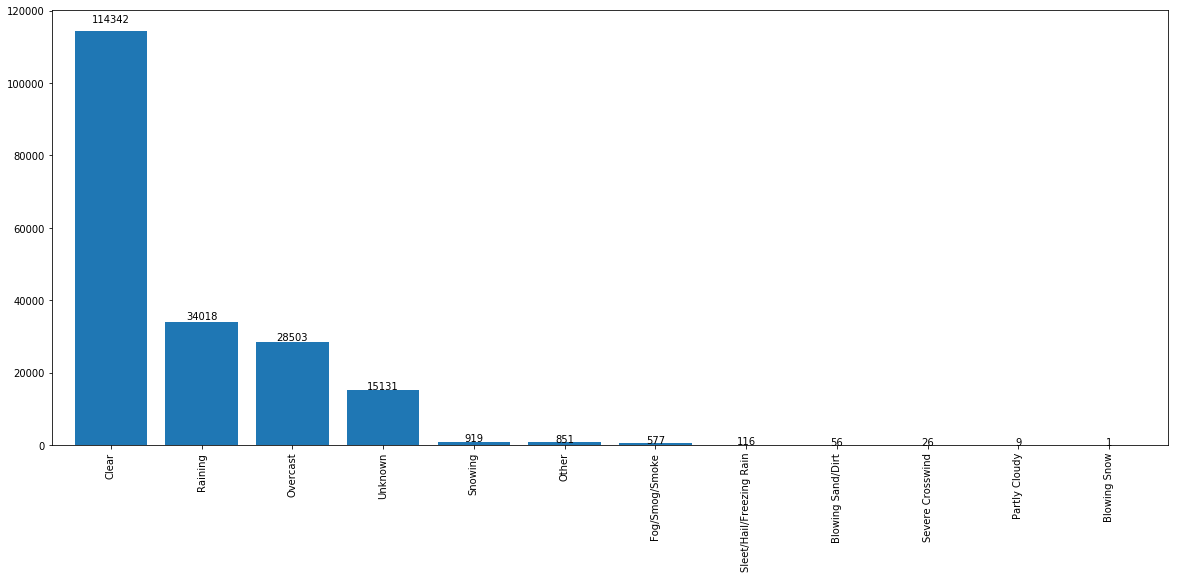

In [14]:
wcp = wcrash.plot(kind = 'bar', figsize = (20,8), width = 0.8)
plt.title = 'Number of collisions for Weather Condition'

for p2 in wcp.patches:
    width = p2.get_width()
    height = p2.get_height()
    x,y = p2.get_xy()
    val = height
    wcp.annotate(val, (x+width/2, y+height*1.02), ha= 'center')

In [15]:
rccrash = df['ROADCOND'].value_counts()
rccrash

Dry               128150
Wet                48709
Unknown            15129
Ice                 1231
Snow/Slush          1014
Other                136
Standing Water       119
Sand/Mud/Dirt         77
Oil                   64
Name: ROADCOND, dtype: int64

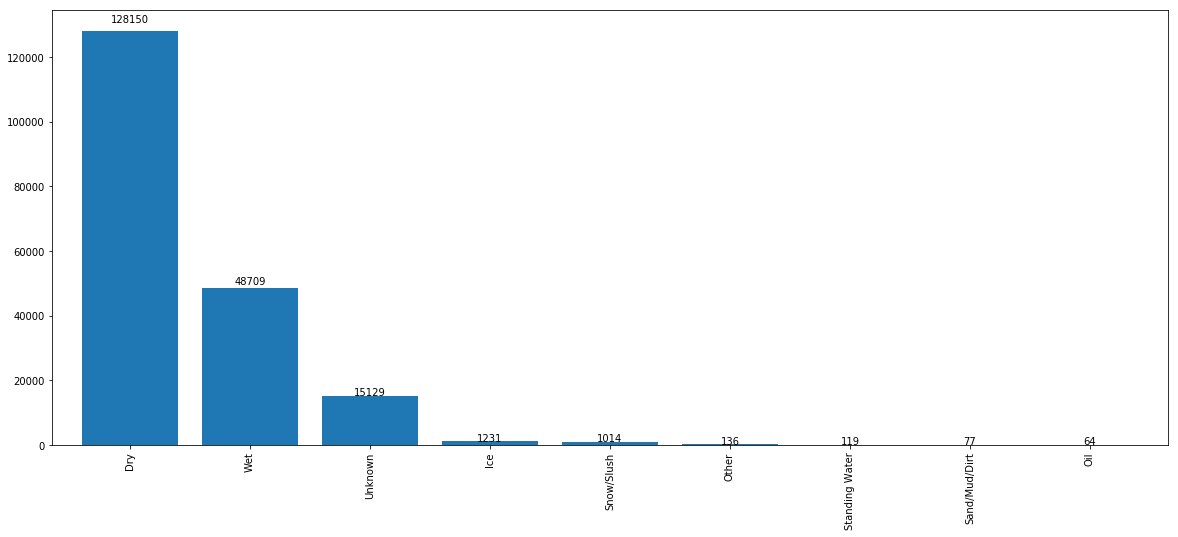

In [16]:
rcp = rccrash.plot(kind = 'bar', figsize = (20,8), width = 0.8)
plt.title = 'Number of collisions for Road Condition'

for p2 in rcp.patches:
    width = p2.get_width()
    height = p2.get_height()
    x,y = p2.get_xy()
    val = height
    rcp.annotate(val, (x+width/2, y+height*1.02), ha= 'center')

In [17]:
lcrash  = df['LIGHTCOND'].value_counts()
lcrash

Daylight                    119147
Dark - Street Lights On      50048
Unknown                      13520
Dusk                          6074
Dawn                          2599
Dark - No Street Lights       1573
Dark - Street Lights Off      1236
Other                          244
Dark - Unknown Lighting         20
Name: LIGHTCOND, dtype: int64

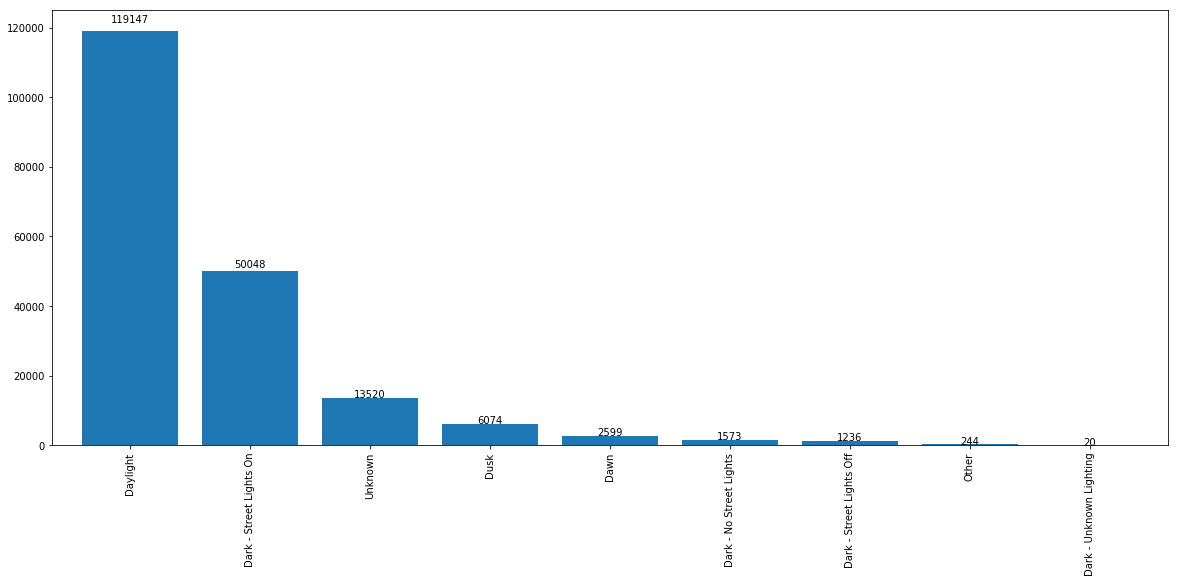

In [18]:
lcp = lcrash.plot(kind = 'bar', figsize = (20,8), width = 0.8)
plt.title = 'Number of collisions for Light Condition'

for p2 in lcp.patches:
    width = p2.get_width()
    height = p2.get_height()
    x,y = p2.get_xy()
    val = height
    lcp.annotate(val, (x+width/2, y+height*1.02), ha= 'center')

In [19]:
df['SEVERITYDESC'].value_counts()

Property Damage Only Collision    137414
Injury Collision                   58665
Serious Injury Collision            3096
Fatality Collision                   349
Name: SEVERITYDESC, dtype: int64

We can trim the 'Unknown' section as it effectively provides us nothing in terms of severity

In [20]:
df['SEVERITYDESC'].value_counts()

Property Damage Only Collision    137414
Injury Collision                   58665
Serious Injury Collision            3096
Fatality Collision                   349
Name: SEVERITYDESC, dtype: int64

## Severity of Collisions

In [21]:
#set the colors for collision for the following charts
pdoCol = '#1CFF3A'
injCol = '#00FAFF'
thirdcol = '#FFC416'
fatal = '#FF3B00'
fifth = 'pink' #Idk why i need this but i do
collcol = (pdoCol, injCol, thirdcol, fatal, fifth)

In [23]:
df['SEVERITYDESC'].value_counts()

Property Damage Only Collision    137414
Injury Collision                   58665
Serious Injury Collision            3096
Fatality Collision                   349
Name: SEVERITYDESC, dtype: int64

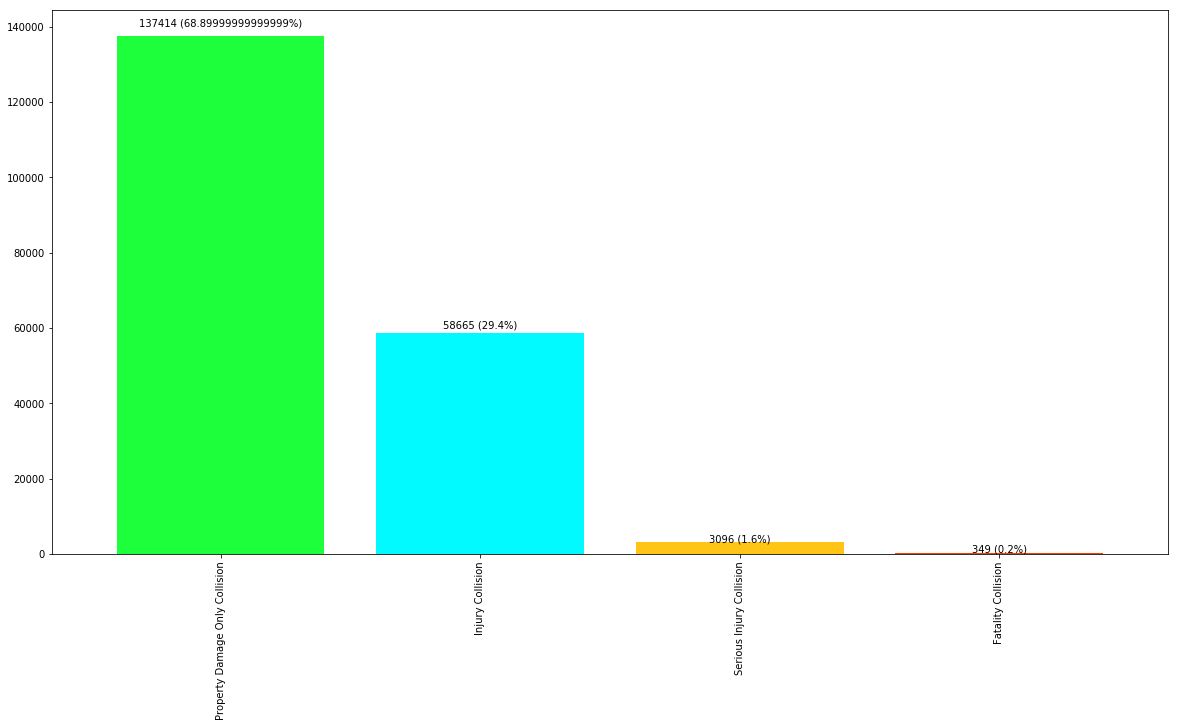

In [24]:
dfSev = df['SEVERITYDESC'].value_counts()
sevp = dfSev.plot(kind = 'bar', figsize = (20,10), width = 0.8, color = collcol) #I don't know why I need a 5th but I do
plt.title = 'Number of Collisions in Each Severity Category'
#plt.legend(loc = 1, fontsize = 14)
total = len(df.index)
for p in sevp.patches:
    width = p.get_width()
    height = p.get_height()
    x,y = p.get_xy()
    val = height
    cent = (round((height/total),3)*100) #this gets the percentage into a solid decimal so i can add the % sign later on
    #sevp.annotate(str(val) + ' ()', (x+width/2, y+height*1.02), ha= 'center')
    sevp.annotate(str(val)+' (' + str(cent)+'%)', (x+width/2, y+height*1.02), ha= 'center')

As we can see from this simple pie chart, in most collisions there is only propertjy damage compared to injuries by a fairly significant margin, with Serious Injury Collisions as well as Fatal Collisions make up even smaller portions of total Collisions. 

### Cleaning the Data

This is the final round of data clean up for the use in a Decision Tree. I will be droping the 'Unknown' and 'Other' entries in the 3 condition columns as well as dropping any null value.

In [29]:
stuff = df[['SEVERITYCODE', 'ROADCOND', 'LIGHTCOND' , 'WEATHER']]
stuff = stuff.dropna()
stuff.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER
2,1,Dry,Daylight,Overcast
3,1,Dry,Other,Clear
4,1,Dry,Daylight,Clear
5,2,Dry,Daylight,Clear
6,1,Dry,Dark - Street Lights On,Clear


In [31]:
#remove other and unknown entries, they are worthless
stuff = stuff[~stuff['ROADCOND'].isin(['Unknown'])]
stuff = stuff[~stuff['ROADCOND'].isin(['Other'])]

stuff = stuff[~stuff['LIGHTCOND'].isin(['Unknown'])]
stuff = stuff[~stuff['LIGHTCOND'].isin(['Other'])]
stuff = stuff[~stuff['LIGHTCOND'].isin(['Dark - Unknown Lighting'])]

stuff = stuff[~stuff['WEATHER'].isin(['Unknown'])]
stuff = stuff[~stuff['WEATHER'].isin(['Other'])]

print('Done!')

Done!


In [33]:
stuff.isnull().sum()

SEVERITYCODE    0
ROADCOND        0
LIGHTCOND       0
WEATHER         0
dtype: int64

# Make a Decision Tree

In [34]:
y = stuff[['SEVERITYCODE']]
x = stuff[['WEATHER', 'LIGHTCOND', 'ROADCOND']].values

In [35]:
x[0:5]

array([['Overcast', 'Daylight', 'Dry'],
       ['Clear', 'Daylight', 'Dry'],
       ['Clear', 'Daylight', 'Dry'],
       ['Clear', 'Dark - Street Lights On', 'Dry'],
       ['Clear', 'Daylight', 'Dry']], dtype=object)

In [36]:
leWeather = preprocessing.LabelEncoder()
leWeather.fit(['Clear', 'Raining','Overcast','Snowing','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'])
x[:,0] = leWeather.transform(x[:,0])

leLight = preprocessing.LabelEncoder()
leLight.fit(['Daylight', 'Dark - Street Lights On', 'Dusk', 'Dawn', 'Dark - No Street Lights', 'Dark - Street Lights Off'])
x[:,1] = leLight.transform(x[:,1])

leRoad = preprocessing.LabelEncoder()
leRoad.fit(['Dry','Wet','Ice','Snow/Slush','Standing Water', 'Sand/Mud/Dirt', 'Oil'])
x[:,2] = leRoad.transform(x[:,2])



x[0:5]

array([[3, 4, 0],
       [1, 4, 0],
       [1, 4, 0],
       [1, 2, 0],
       [1, 4, 0]], dtype=object)

In [37]:
from sklearn.model_selection import train_test_split
x_trainset, x_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)

In [38]:
print((x_trainset).shape)
print((y_trainset).shape)

(122343, 3)
(122343, 1)


In [39]:
print((x_testset).shape)
print((y_testset).shape)

(52433, 3)
(52433, 1)


In [40]:
decTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
decTree.fit(x_trainset, y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
testTree = decTree.predict(x_testset)

In [43]:
print(testTree[0:5])
print(y_testset[0:5])

['1' '1' '1' '1' '1']
       SEVERITYCODE
205358            1
149391            2
135182            1
20322             2
145239            1


### Results

First I will make a bar chart test set then make one of the predicted set in order to best visualise the discrepensies between the two.

In [44]:
answer = pd.DataFrame(y_testset)
avc = answer['SEVERITYCODE'].value_counts()

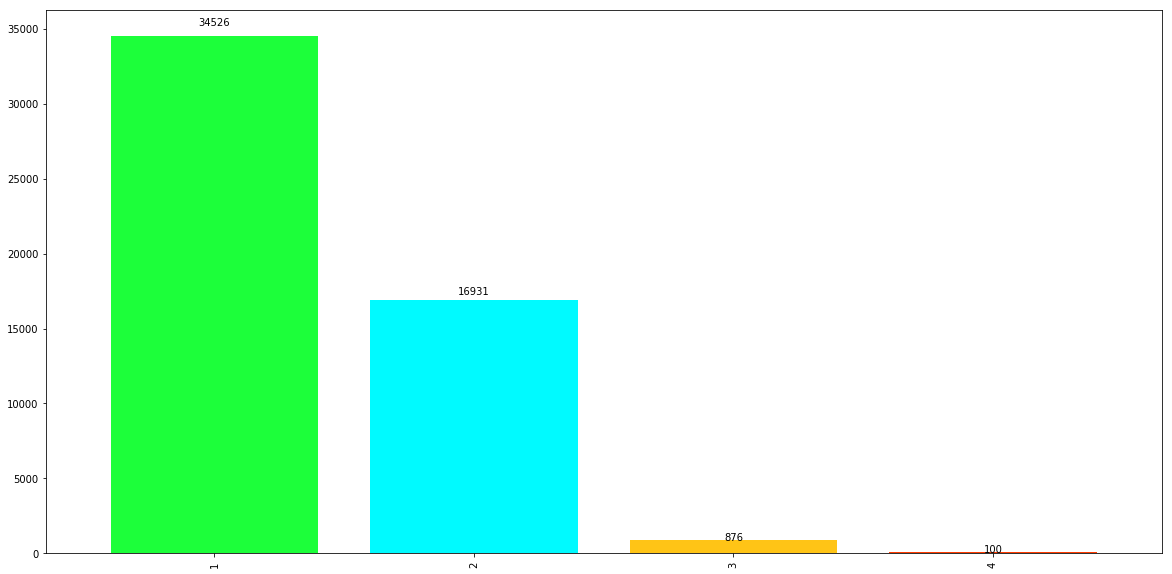

In [45]:
avcp = avc.plot(kind = 'bar', figsize = (20,10), width = 0.8, color = ('#1CFF3A','#00FAFF','#FFC416','#FF3B00', 'pink'))
for p in avcp.patches:
    width = p.get_width()
    height = p.get_height()
    x,y = p.get_xy()
    val = height
    avcp.annotate(val, (x+width/2, y+height*1.02), ha= 'center')

In [46]:
res = pd.DataFrame(testTree)
rvc = res[0].value_counts()
rvc

1    52433
Name: 0, dtype: int64

Now to make a chart of the predicted results

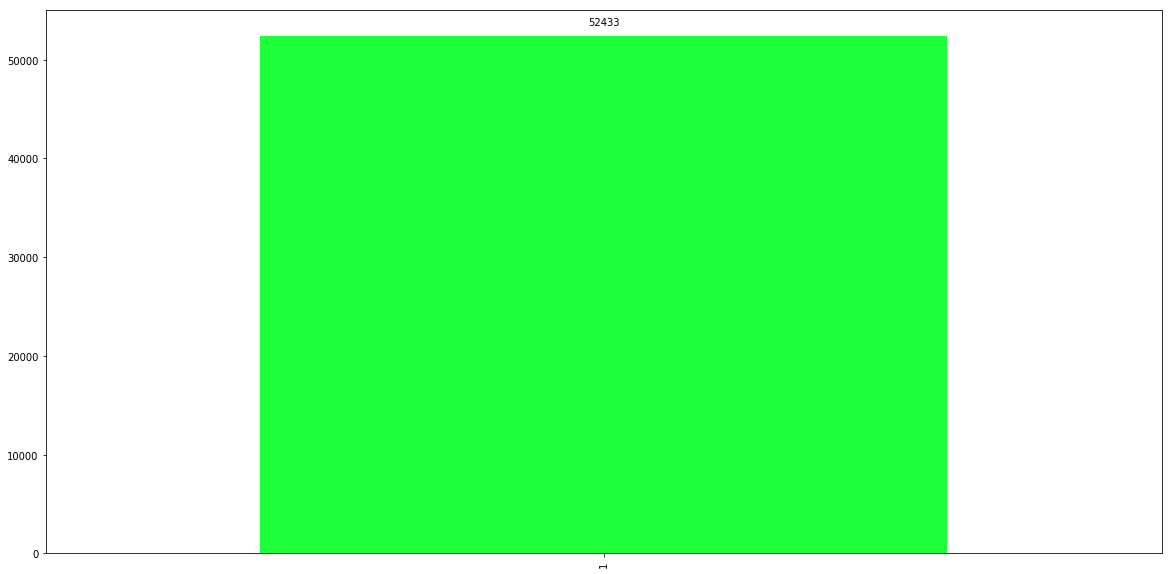

In [47]:
rvcp = rvc.plot(kind = 'bar', figsize = (20,10), width = 0.8, color = ('#1CFF3A','#00FAFF','#FFC416','#FF3B00', 'pink'))
for p in rvcp.patches:
    width = p.get_width()
    height = p.get_height()
    x,y = p.get_xy()
    val = height
    rvcp.annotate(val, (x+width/2, y+height*1.02), ha= 'center')

I was not expecting the end result for everything to be Property Damage Only collisions. In order to see how well this tree did I will test it for accuracy.

In [48]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, testTree))

DecisionTrees's Accuracy:  0.6584784391509164


# Discussion

Ultimatley from these results it would appear that are not that great at predicting the severity of a collision. When I generated the charts that had the number of collisions per weather/road/light condition I was surprised that Clear, Dry, and Daylight were the most common collision conditions. The fact that I would consider these to be the safest driving conditions, yet they have the highest number of collisions in their category. 
 
I believe that there looking into more behavior focused variables, such as speeding, intoxicated driving, or distracted driving may provide a better correlation to the severity of a collision.

Another avenue would be to focus instead on the number of vehicles in the collions with the VEHCOUNT, rather than the severity of the collision. Another option would be to use the coordinate data to find what locations in Seattle are more accident prone.

# Conclusion

From these results we can conclude that using the conditions of the weather, road, and light are not the best indicator of the severity of a collision. According to initial data sample, nearly 69% of all collisoins were Property Damage Only, with Injury Collisions made up just under 30%, Severe Injury at 1.6% and Fatal Collisions at .2%, therefore even just by going off of 

Another factor to consider is that the conditions with the most collisions were Clear Weather, Dry Road Conditions and Daylight, even at the start of this I was somewhat surprised as  those were what I would consider to be the safest driving conditions and yet they had the largest number of collisions. This suggests that there is a different reason why collisions occur, rather than just the environmental conditions. I believe that it can be explained that under the safest conditions people are most likely to drive recklessly and as a result end up in a wreck as well as that people may be more likely to be cautious under less ideal road conditions.